In [20]:
# importando as bibliotecas

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
import seaborn as sn
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc
from xgboost import XGBClassifier
import shap

In [7]:
# lendo o dataframe pré processado

df = pd.read_csv('data.csv')

In [8]:
# definindo o X e o y do modelo
'''
Sendo o X todo o dataframe sem a coluna que identifica 
o perfil (assinante e porspect), e o y sendo a coluna 
de perfil.
'''

X = df.drop(['PERFIL'], axis=1)
y = df['PERFIL']

In [9]:
# separando os dados em treino e teste
'''
Os dados de treino e teste são separados na proporção
25% destinado para teste e 75% destinado para o treino.
Essa separação é feita randomicamente.
'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [10]:
# treinando e ajustando o modelo
'''
O modelo utilizado é o XGBClassifier()
'''

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier()

In [12]:
explainer = shap.TreeExplainer(model)

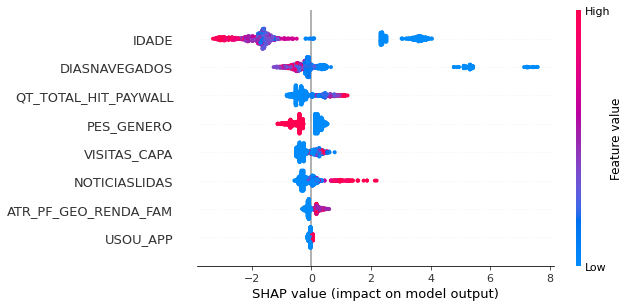

In [14]:
# analisando a interferência de cada variável no modelo
'''
A biblioteca shap permite visualizar através do gráfico
de explicação de árvore qual o nível de interência das 
variáveis no modelo de classificação. Através do gráfico,
foi possível visualizar que as variáveis IDADE, DIASNAVEGADOS, 
QT_TOTAL_HIT_PAYWALL e NOTICIASLIDAS são as variáveis que mais 
interferem na classificação. Já as variáveis ART_PF_GEO_RENDA_FAM 
e USOU_APP são as variáveis que não interferem na classificação.
'''

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, feature_names=X.columns)

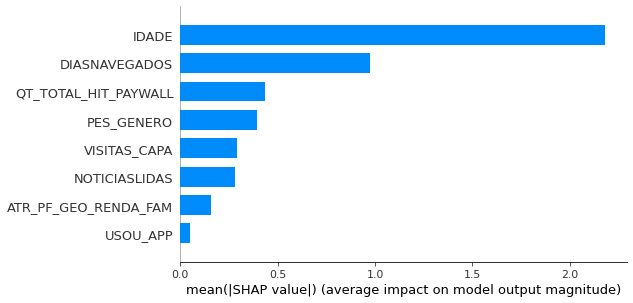

In [15]:
# analisando a interferência de cada variável no modelo

shap.summary_plot(shap_values, X_train, feature_names=X.columns, plot_type="bar")

In [16]:
# avaliação do modelo
'''
Avaliação do modelo através das métricas de acurácia, recall e f1.
A acurácia de 95% indica que a cada 100 entradas, 94,78% são 
classificadas de forma correta.
'''

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy:', accuracy)
print('recall:  ', recall)
print('f1:      ', f1)

accuracy: 0.9507246376811594
recall:   0.8924731182795699
f1:       0.9071038251366121


In [24]:
# Criando um df com os dados de teste e o que foi predito

data = pd.DataFrame(data = y_test)
data['Predict'] = y_pred
data = data.rename(columns = {'PERFIL': 'Actual'})

In [25]:
# Criando a Matrix de Confusão

df_matrix = pd.DataFrame(data, columns=['Actual','Predict'])
confusion_matrix = pd.crosstab(df_matrix['Actual'], df_matrix['Predict'], 
                               rownames = ['Actual'], colnames=['Predict'])

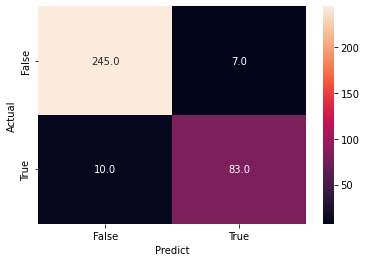

In [26]:
# Vizualizando a Matrix de confusão com o heatmap

sn.heatmap(confusion_matrix, annot = True, fmt=".1f")
plt.show()

In [27]:
print(model.predict_proba(X_test))

[[0.00573051 0.9942695 ]
 [0.07509744 0.92490256]
 [0.08467138 0.9153286 ]
 [0.9816466  0.01835342]
 [0.98510027 0.01489974]
 [0.92612535 0.07387467]
 [0.93102473 0.06897528]
 [0.8996976  0.10030238]
 [0.9961386  0.00386143]
 [0.9539069  0.04609308]
 [0.95757395 0.04242605]
 [0.07737833 0.92262167]
 [0.9742374  0.02576261]
 [0.98017275 0.01982727]
 [0.97100466 0.02899536]
 [0.9866027  0.01339728]
 [0.99082804 0.00917199]
 [0.9713815  0.0286185 ]
 [0.94835466 0.05164532]
 [0.9901785  0.00982146]
 [0.9781818  0.02181822]
 [0.8979035  0.10209649]
 [0.9585103  0.04148971]
 [0.04669678 0.9533032 ]
 [0.99690354 0.00309647]
 [0.00504118 0.9949588 ]
 [0.9566016  0.04339835]
 [0.0487324  0.9512676 ]
 [0.8911479  0.10885211]
 [0.99016434 0.00983565]
 [0.88639724 0.11360276]
 [0.97333694 0.02666305]
 [0.9520362  0.04796381]
 [0.00460404 0.99539596]
 [0.9967305  0.00326948]
 [0.9810184  0.01898156]
 [0.05132657 0.9486734 ]
 [0.9837688  0.0162312 ]
 [0.9809154  0.01908459]
 [0.9821337  0.01786632]


In [28]:
X_test_pred_prob = model.predict_proba(X_test)
X_test_pred_prob_df = pd.DataFrame(X_test_pred_prob)
X_test_pred_prob_df

,0,1
0,0.005731,0.994269
1,0.075097,0.924903
2,0.084671,0.915329
3,0.981647,0.018353
4,0.985100,0.014900
...,...,...
340,0.988360,0.011640
341,0.990628,0.009372
342,0.991509,0.008491
343,0.005731,0.994269


In [29]:
y_pred = pd.DataFrame()
y_pred['y_actual'] = data['Actual']
y_pred['y_pred'] = data['Predict']

x_prob = pd.DataFrame()
x_prob['PROB_PROSPECT'] = X_test_pred_prob_df[0]
x_prob['PROB_ASSINANTE'] = X_test_pred_prob_df[1]


x_prob.to_csv('x_prob.csv')
y_pred.to_csv('y_pred.csv')